In [1]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

In [11]:
# load modified file with some pre-processing completed
df = pd.read_csv("C:/Users/pkdut/Downloads/dengue_data_preprocessed1.csv", index_col=0)
df.shape

(100120, 40)

In [12]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [13]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'eye_pain','fever','headache','nausea','rashes','Myalgia','Flu','Fatigue','bleeding',\
          'age','level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [14]:
df.dtypes


encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
ache or pain                 int64
eye_pain                    object
fever                       object
headache                    object
nausea                      object
rashes                      object
Myalgia                     object
Flu                         object
Fatigue                     object
bleeding            

In [15]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [16]:
datframe.corr()

,L1,L2
L1,1.000000,0.081542
L2,0.081542,1.000000


In [17]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

,L1,L2
L1,1.000000,0.081542
L2,0.081542,1.000000


In [18]:
# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [19]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [20]:
num_col

['number_outpatient',
 'dengueMed',
 'number_emergency',
 'number_diagnoses',
 'num_medications',
 'nummed',
 'ache or pain',
 'time_in_hospital',
 'numchange',
 'age',
 'num_procedures',
 'number_inpatient',
 'num_lab_procedures',
 'service_utilization']

In [21]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [22]:
df.shape

(100120, 37)

In [23]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [24]:
numerics

['dengueMed',
 'number_diagnoses',
 'num_medications',
 'nummed',
 'ache or pain',
 'time_in_hospital',
 'numchange',
 'age',
 'num_procedures',
 'num_lab_procedures',
 'service_utilization']

In [25]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.dengueMed = df.dengueMed.astype('int64')

i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'eye_pain','fever','headache','nausea','rashes','Myalgia','Flu','Fatigue','bleeding',\
          'age','level1_diag1','level2_diag1','level1_diag2','level2_diag2','level1_diag3' ,'level2_diag3']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
ache or pain                 int64
eye_pain                     int64
fever                        int64
headache                     int64
nausea                       int64
rashes                       int64
Myalgia                      int64
Flu                          int64
Fatigue                      int64
bleeding                     int64
dengueMed                    int64
readmitted                   int64
service_utilization 

In [26]:
df.eye_pain.value_counts()

-99    83243
 1     11935
 0      4942
Name: eye_pain, dtype: int64

In [27]:
dfcopy = df.copy(deep = True)

In [28]:
df = dfcopy.copy(deep = True)

In [29]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [30]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3','level2_diag3'], axis=1, inplace=True)

In [31]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,Myalgia,Flu,Fatigue,bleeding,dengueMed,readmitted,service_utilization,numchange,nummed,level1_diag1
0,2278392,8222157,Caucasian,0,5,5,18,1,1,41,...,0,0,0,0,0,0,0,1,-99,4
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,0,0,0,0,1,0,0,1,-99,0


In [32]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),

('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [33]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [34]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


In [35]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [36]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 37)

In [37]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [38]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())

table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

In [39]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(1296,)


time_in_hospital                     number_diagnoses|time_in_hospital      0.939862
number_diagnoses|time_in_hospital    time_in_hospital                       0.939862
num_medications                      num_medications|number_diagnoses       0.911776
num_medications|number_diagnoses     num_medications                        0.911776
num_medications|numchange            num_medications                        0.907048
num_medications                      num_medications|numchange              0.907048
time_in_hospital|num_lab_procedures  time_in_hospital                       0.862041
time_in_hospital                     time_in_hospital|num_lab_procedures    0.862041
num_medications|num_procedures       num_procedures                         0.835093
num_procedures                       num_medications|num_procedures         0.835093
time_in_hospital|num_lab_procedures  number_diagnoses|time_in_hospital      0.830730
number_diagnoses|time_in_hospital    time_in_hospital|num_lab_pro

In [40]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'ache or pain', 'eye_pain', 'level1_diag1'], drop_first = True)

C:\Users\pkdut\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 'ache or pain', 'eye_pain', 'level1_diag1' ]

In [42]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_cols

['Fatigue',
 'encounter_id',
 'fever',
 'patient_nbr',
 'Myalgia',
 'level1_diag1',
 'discharge_disposition_id',
 'num_medications|num_procedures',
 'admission_type_id',
 'num_lab_procedures',
 'dengueMed',
 'num_medications|time_in_hospital',
 'number_diagnoses|time_in_hospital',
 'num_medications',
 'ache or pain',
 'time_in_hospital',
 'numchange',
 'num_procedures',
 'Flu',
 'service_utilization',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'num_medications|numchange',
 'eye_pain',
 'gender',
 'admission_source_id',
 'nummed',
 'age',
 'headache',
 'rashes',
 'number_diagnoses',
 'time_in_hospital|num_lab_procedures',
 'nausea',
 'bleeding']

In [43]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [44]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [48]:
feature_set_1 = ['age','time_in_hospital','num_procedures','num_medications','number_diagnoses','ache or pain','eye_pain','fever','headache','nausea','rashes','Myalgia','Flu','Fatigue','bleeding','num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses','number_diagnoses|time_in_hospital', 'num_medications|numchange','level1_diag1']

In [49]:
feature_set_2 = ['age','time_in_hospital','num_procedures','num_medications','number_diagnoses','ache or pain','eye_pain','fever','headache','nausea','rashes','Myalgia','Flu','Fatigue','bleeding','num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses','number_diagnoses|time_in_hospital', 'num_medications|numchange','level1_diag1','level2_diag1','level1_diag2','level2_diag2','level1_diag3','level2_diag3']


In [50]:
train_input = df[feature_set_1]

In [51]:
train_output = df['readmitted']

In [52]:
df.dtypes

encounter_id                            int64
patient_nbr                             int64
race                                   object
gender                                  int64
age                                     int64
admission_type_id                       int64
discharge_disposition_id                int64
admission_source_id                     int64
time_in_hospital                        int64
num_lab_procedures                      int64
num_procedures                          int64
num_medications                         int64
number_diagnoses                        int64
ache or pain                            int64
eye_pain                                int64
fever                                   int64
headache                                int64
nausea                                  int64
rashes                                  int64
Myalgia                                 int64
Flu                                     int64
Fatigue                           

In [53]:
# Data balancing applied using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new,test_size=0.20, random_state=0)

Original dataset shape Counter({0: 88763, 1: 11357})
New dataset shape Counter({0: 88763, 1: 88763})


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train,
Y_train, cv=10))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 82.40%
Dev Set score: 83.14%


In [55]:
Y_dev_predict = dte.predict(X_dev)
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name =
'Predict'), margins = True)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))


Accuracy is 0.83
Precision is 0.84
Recall is 0.82
AUC is 0.83


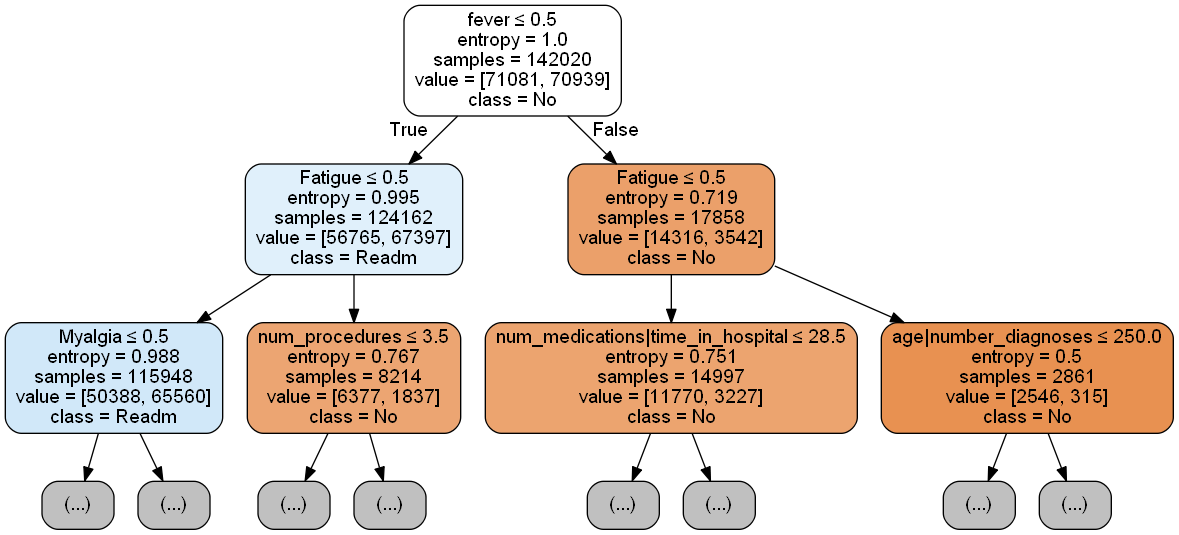

In [63]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot",
feature_names=X_train.columns, max_depth=2, class_names=["No","Readm"],
filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())


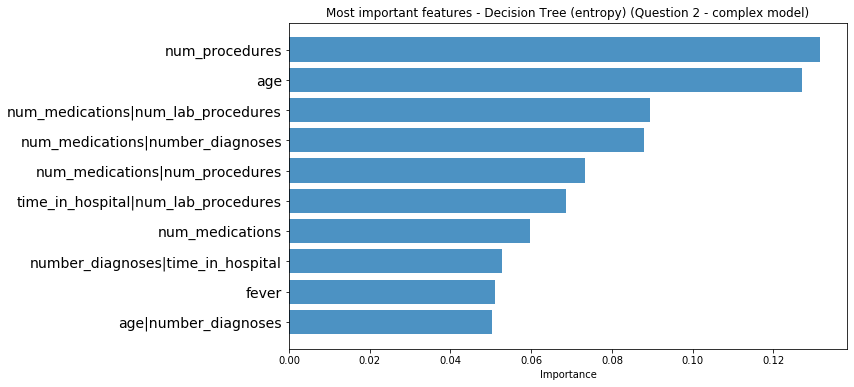

In [60]:
# Shot top most features based on importance
feature_names = X_train.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)],
columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center',
alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (entropy) (Question 2 - complex model)')
plt.show()